# Model Experimentation

In this section, we will experiment, for the first time, some classification models on the `customer_cleaned` dataset. 

In order to have a simple baseline, we will employ simple models that are easy to interpret and understand. The models we will experiment with are:
- Decision Tree
- Random Forest
- K-Nearest Neighbors

The objective of this section is to get a sense of how the models perform on the dataset to identify potential candidates for further optimization, or find a problem with the data that needs to be addressed before proceeding.

We will also perform some hyperparameter tuning on the models to see how their performance can be improved with some optimization.

In order to get some performance metrics, we will divide the training data into a training and validation sets (70% - 30%), and use the valdation set to evaluate the models.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [96]:
# Load the treated dataset
df = pd.read_csv('../data/customer_cleaned.csv')
df.shape

(72458, 17)

In [97]:
df.head(10)

,sex,is_employed,income,health_ins,num_vehicles,age,state_of_res,gas_usage,rooms,marital_status_Divorced/Separated,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner free and clear,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented
0,1,1,-0.34,1,0.00,0.04,0.0,2.71,0.4,0,0,1,0,1,0,0,0
1,0,0,-0.32,1,0.00,0.78,0.0,-0.60,1.0,1,0,0,0,0,0,0,1
2,0,1,-0.36,1,0.33,0.13,0.0,-0.01,0.4,0,0,1,0,0,1,0,0
3,0,0,-0.07,1,0.17,0.92,0.0,1.27,0.2,0,0,0,1,1,0,0,0
4,1,1,-0.05,1,0.33,0.59,0.0,-0.60,0.2,1,0,0,0,0,0,0,1
5,1,0,-0.53,1,0.33,0.71,0.0,2.55,1.0,0,1,0,0,1,0,0,0
6,0,1,-0.28,0,0.33,0.06,0.0,-0.60,0.4,0,1,0,0,0,0,0,1
7,0,0,-0.12,1,0.33,0.67,0.0,0.15,0.8,0,1,0,0,1,0,0,0
8,0,1,-0.29,1,0.83,0.08,0.0,-0.60,0.6,0,0,1,0,1,0,0,0
9,1,1,-0.18,1,0.50,0.42,0.0,-0.33,1.0,0,1,0,0,0,1,0,0


In [98]:
# Splitting the columns into features and target
X = df.drop(['health_ins'], axis=1)
y = df['health_ins']

X.shape

(72458, 16)

In [99]:
# Divide the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [100]:
# Functio to rexeive results of a model and plot its evolution for a given parameter
def plot_measures(measures):
    parameters = measures.iloc[:,0]
    accuracy = measures.iloc[:,1]
    precision = measures.iloc[:,2]
    recall = measures.iloc[:,3]
    f1 = measures.iloc[:,4]
    spec = measures.iloc[:,5]

    sns.lineplot(x=parameters, y=accuracy, label='accuracy')
    sns.lineplot(x=parameters, y=precision, label='precision')
    sns.lineplot(x=parameters, y=recall, label='recall')
    sns.lineplot(x=parameters, y=f1, label='f1')
    sns.lineplot(x=parameters, y=spec, label='specificity')

In [101]:
# Function to, given the prediction of a model, return its: accuracy, precision, recall, f1 and confusion matrix
def get_metrics(y_pred):
    acc = round(accuracy_score(y_test, y_pred),3)
    prec = round(precision_score(y_test, y_pred),3)
    rec = round(recall_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    spec = round(tn / (tn+fp),3)
    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'specificity': spec, 'cm': cm}

In [102]:
# Dataframe to store the results of the models
models = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])

## Decision Trees

Fitting model with 1
Fitting model with 3
Fitting model with 5
Fitting model with 7
Fitting model with 9
Fitting model with 11
Fitting model with 13
Fitting model with 15
Fitting model with 17
Fitting model with 19
Fitting model with None


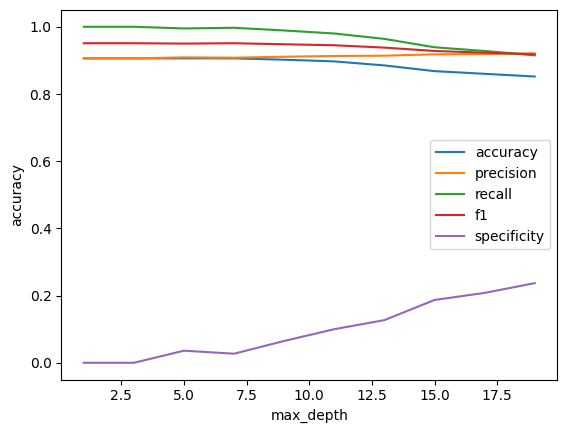

In [103]:
dec_tree_measures = pd.DataFrame(columns=['max_depth', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])
parameters = list(range(1, 20, 2)) + [None]

for max_depth in parameters:
    print(f'Fitting model with {max_depth}')
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    new_row = {'max_depth': max_depth, **measures}
    dec_tree_measures.loc[len(dec_tree_measures)] = new_row


plot_measures(dec_tree_measures)

In [104]:
row = dec_tree_measures[dec_tree_measures['max_depth'] == 7]
models.loc[len(models)] = {'model': 'Decision Tree', **row.iloc[0,1:]}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.906,0.908,0.997,0.951,0.027,"[[55, 1981], [53, 19649]]"


## Random Forest

Fitting model with 10
Fitting model with 20
Fitting model with 50
Fitting model with 75
Fitting model with 100
Fitting model with 200
Fitting model with 500


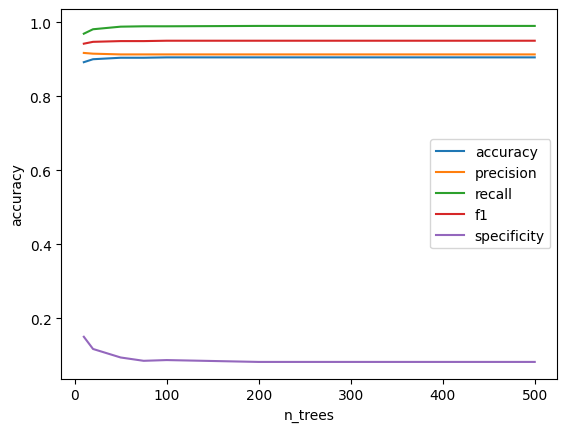

In [105]:
rf_measures = pd.DataFrame(columns=['n_trees', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])
parameters = [10, 20, 50, 75, 100, 200, 500]

for n_trees in parameters:
    print(f'Fitting model with {n_trees}')
    model = RandomForestClassifier(n_estimators=n_trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    new_row = {'n_trees': n_trees, **measures}
    rf_measures.loc[len(rf_measures)] = new_row

plot_measures(rf_measures)

In [106]:
row = rf_measures[rf_measures['n_trees'] == 100]
models.loc[len(models)] = {'model': 'Random Forest', **row.iloc[0,1:]}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.906,0.908,0.997,0.951,0.027,"[[55, 1981], [53, 19649]]"
1,Random Forest,0.905,0.913,0.989,0.950,0.087,"[[178, 1858], [210, 19492]]"


## K Nearest Neighbors

Fitting model with 3
Fitting model with 5
Fitting model with 7
Fitting model with 9
Fitting model with 11
Fitting model with 13
Fitting model with 15
Fitting model with 17
Fitting model with 19
Fitting model with 21
Fitting model with 23


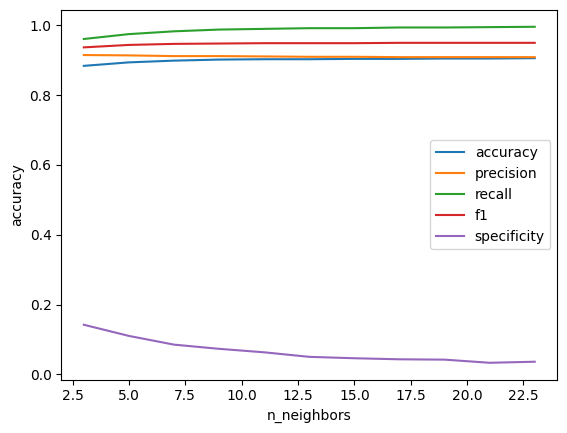

In [107]:
knn_measures = pd.DataFrame(columns=['n_neighbors', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'cm'])
parameters = list(range(3, 25, 2))

for n_neighbors in parameters:
    print(f'Fitting model with {n_neighbors}')
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    measures = get_metrics(y_pred)
    new_row = {'n_neighbors': n_neighbors, **measures}
    knn_measures.loc[len(knn_measures)] = new_row

plot_measures(knn_measures)

In [108]:
row = knn_measures[knn_measures['n_neighbors'] == 11]
models.loc[len(models)] = {'model': 'KNN', **row.iloc[0,1:]}
models

,model,accuracy,precision,recall,f1,specificity,cm
0,Decision Tree,0.906,0.908,0.997,0.951,0.027,"[[55, 1981], [53, 19649]]"
1,Random Forest,0.905,0.913,0.989,0.950,0.087,"[[178, 1858], [210, 19492]]"
2,KNN,0.903,0.911,0.990,0.949,0.063,"[[128, 1908], [199, 19503]]"


## Overall comparison of the models

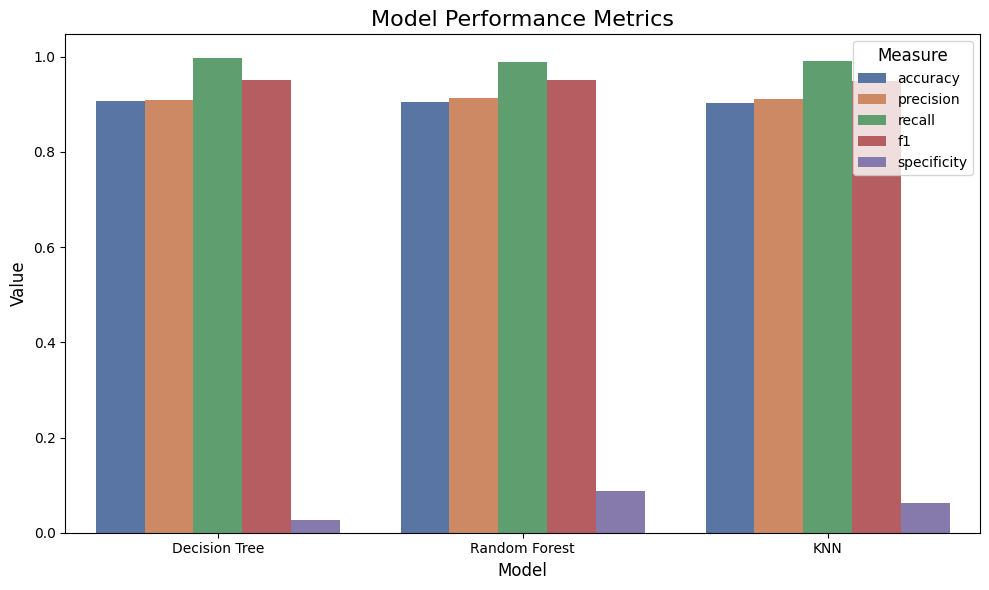

In [109]:
melted = models.melt(id_vars="model", value_vars=["accuracy", "precision", "recall", "f1", "specificity"],
                     var_name="measure", value_name="value")

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x="model", y="value", hue="measure", palette="deep")

plt.title("Model Performance Metrics", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Measure", fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()

In [110]:
conf_mxs = models[['model', 'cm']]
conf_mxs

,model,cm
0,Decision Tree,"[[55, 1981], [53, 19649]]"
1,Random Forest,"[[178, 1858], [210, 19492]]"
2,KNN,"[[128, 1908], [199, 19503]]"


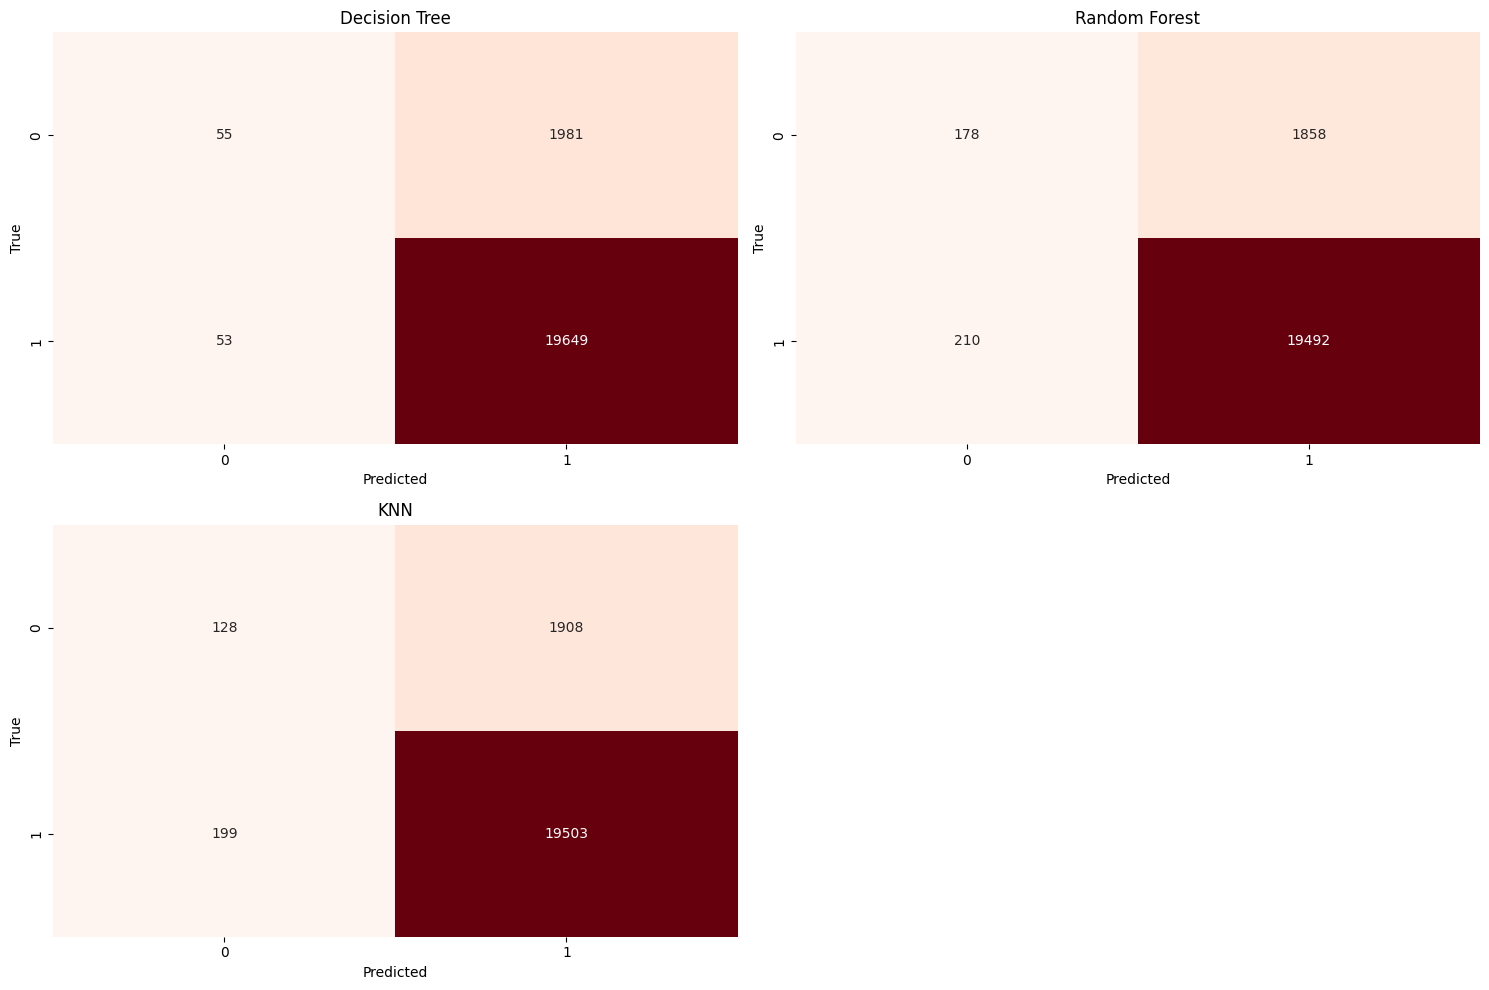

In [111]:
# plot confusion matrixes
plt.figure(figsize=(15, 10))
for i, row in conf_mxs.iterrows():
    plt.subplot(2, 2, i+1)
    sns.heatmap(row['cm'], annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(row['model'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()

As we can see, these models seem to perform very well. All of them achieve accuracy, F1-score, recall and precision around 0.9.

Does this mean that we can move forward to more complex models? Not at all.
All these models are getting very low values for specificity, meaning they are not good at capturing the negative class. This indicates the presence of very underfitted models, biased towards the positive class.

The confusion matrices resulting of each of these models prove that these models are not capable of correclty predicting a considerbale amount of negative cases.

In [112]:
# Frequency of target variable
print(y.value_counts(dropna=False))

# Frequency of target variable in percentage
print(y.value_counts(dropna=False, normalize=True))

health_ins
1    65553
0     6905
Name: count, dtype: int64
health_ins
1    0.904703
0    0.095297
Name: proportion, dtype: float64


Once we are using the trainig dataset to both train and validate our models, the "classical" metrics are not enough to reason about model performance. This dataset is highly imbalanced, meaning that both test and validation partitions will have a similar distribution. So, if we use a model that learns to predict everything as positive, when tested in a dataset with similar distribution, it will achieve very good accruacy, F1, ... metrics.

In [113]:
# Frequency of target variable in train set
print(y_train.value_counts(dropna=False, normalize=True))

# Frequency of target variable in test set
print(y_test.value_counts(dropna=False, normalize=True))

health_ins
1    0.904002
0    0.095998
Name: proportion, dtype: float64
health_ins
1    0.906339
0    0.093661
Name: proportion, dtype: float64


Next section will focus on how to address this issue, by aplying balacing techniques to the dataset.